#Install Package

In [ ]:
! pip install opencv-python

In [ ]:
! pip install tensorflow

# Import Package

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import zipfile
from sklearn.metrics import classification_report,confusion_matrix
import random
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
# from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

# Import Dataset

## Get dataset from kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qoriayudipratama","key":"1c5ecc1f897d3be482cb63e9ab07f4e2"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
#! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && mv kaggle.json ~/.kaggle/ && echo 'Done'

In [ ]:
! kaggle datasets download kaivalyashah/apple-disease-detection

 58% 9.00M/15.6M [00:00<00:00, 31.0MB/s]
100% 15.6M/15.6M [00:00<00:00, 48.3MB/s]


## Unzip dataset

In [ ]:
zip_ref = zipfile.ZipFile('apple-disease-detection.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## Call the data

In [ ]:
train = os.path.join("apple_disease_classification", "Train")
tes = os.path.join("apple_disease_classification", "Test")

CATEGORIES = ["Scab_Apple","Rot_Apple","Blotch_Apple","Normal_Apple"]
SIZE = (100,100)


train_data = []
for C in CATEGORIES:
    label = CATEGORIES.index(C)
    path = os.path.join(train, C)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, SIZE)
        train_data.append([img, label])

test_data = []
for C in CATEGORIES:
    label = CATEGORIES.index(C)
    path = os.path.join(tes,C)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img = cv.resize(img, SIZE)
        test_data.append([img, label])

print(len(train_data))
print(len(test_data))

382
120


In [ ]:
#UKURAN GAMBAR TERKECILNYA
minp, minl = 1000, 1000
for C in CATEGORIES:
    label = CATEGORIES.index(C)
    path = os.path.join(train, C)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        p, l, d = img.shape
        if p < minp:
            minp = p
        if l < minl:
            minl = l
    print(minp, minl)

minp, minl = 1000, 1000
for C in CATEGORIES:
    label = CATEGORIES.index(C)
    path = os.path.join(tes,C)
    for img_file in os.listdir(path):
        img = cv.imread(os.path.join(path, img_file), 1)
        p, l, d = img.shape
        if p < minp:
            minp = p
        if l < minl:
            minl = l
    print(minp, minl)


100 100
100 100
100 100
100 100
149 194
149 194
108 112
101 89


## Shuffling data

In [ ]:
random.shuffle(train_data)
random.shuffle(test_data)

for lbl in train_data[:10]:
    print(lbl[1])

2
2
2
0
1
3
2
2
0
2


## Plot the proportion of data

In [ ]:
X_train = []
y_train = []

for features, label in train_data:
    X_train.append(features)
    y_train.append(label)

Y = []
for i in y_train:
    if i == 0:
        Y.append("APPLE SCAB")
    elif i == 1:
        Y.append("APPLE ROT")
    elif i == 2:
        Y.append("APPLE BLOTCH")
    else:
        Y.append("APPLE HEALTHY")

len(X_train), len(y_train)

(382, 382)

In [ ]:
X_test = []
y_test = []

for features, label in test_data:
    X_test.append(features)
    y_test.append(label)

Z = []
for i in y_test:
    if i == 0:
        Z.append("APPLE SCAB")
    elif i == 1:
        Z.append("APPLE ROT")
    elif i == 2:
        Z.append("APPLE BLOTCH")
    else:
        Z.append("APPLE HEALTHY")

len(X_test), len(y_test)

(120, 120)

In [ ]:
X_train = np.array(X_train).reshape(-1, SIZE[0], SIZE[1], 3)
X_train = X_train / 255.0
X_train.shape

(382, 100, 100, 3)

In [ ]:
X_test = np.array(X_test).reshape(-1,SIZE[0], SIZE[1], 3)
X_test = X_test / 255.0
X_test.shape

(120, 100, 100, 3)

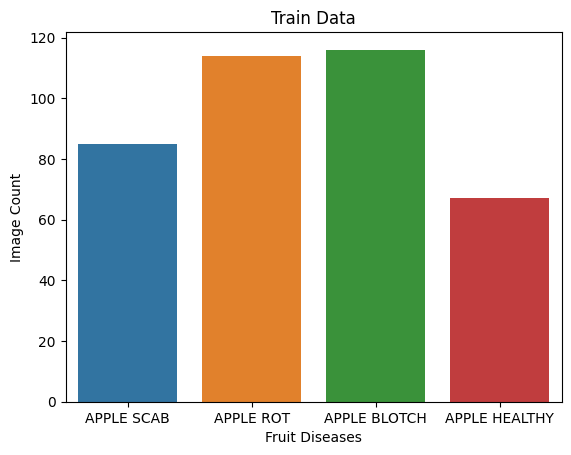

In [ ]:
order = ['APPLE SCAB','APPLE ROT','APPLE BLOTCH','APPLE HEALTHY']
ax = sns.countplot(x=Y, order=order)
ax.set_xlabel("Fruit Diseases")
ax.set_xticklabels(ax.get_xticklabels(), ha='center')
ax.set_ylabel("Image Count")
ax.set_title("Train Data")
plt.show()

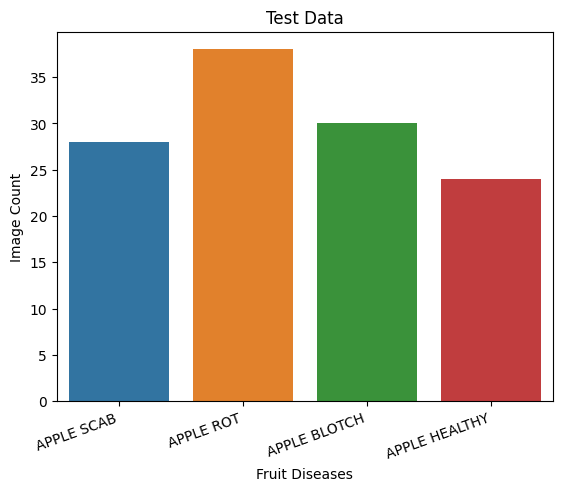

In [ ]:
ax = sns.countplot(x=Z, order=order)
ax.set_xlabel("Fruit Diseases")
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
ax.set_ylabel("Image Count")
ax.set_title("Test Data")
plt.show()

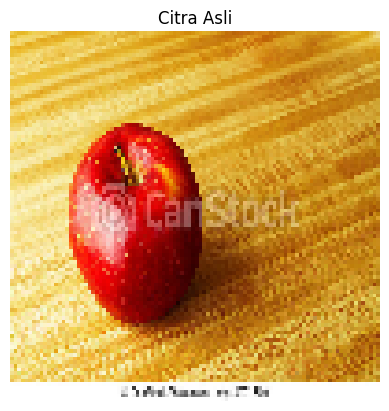

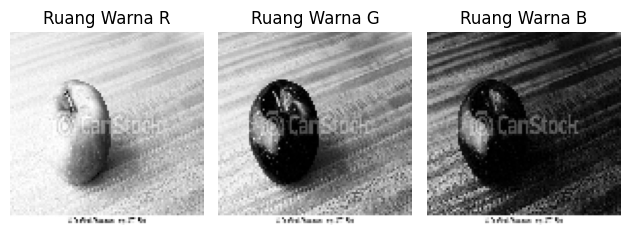

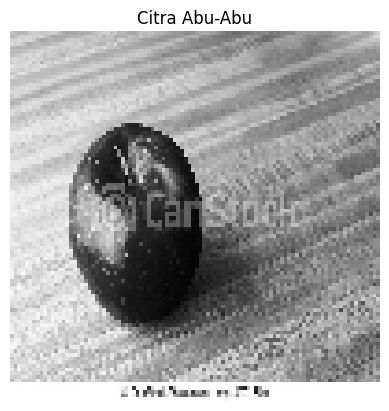

<function matplotlib.pyplot.show(close=None, block=None)>

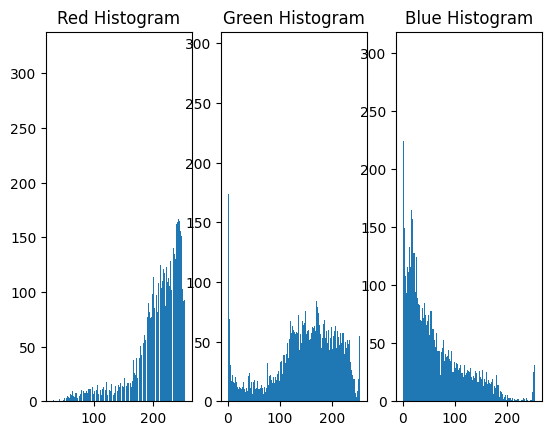

In [ ]:
import skimage.color as color

#RANDOM SAMPLE
sample = random.choice(train_data)
image = sample[0]
label = sample[1]

#CITRA ASLI
plt.imshow(image)
plt.title("Citra Asli")
plt.axis('off')
plt.show()

#CITRA RGB
red_channel = image[:, :, 0]  # Saluran merah
green_channel = image[:, :, 1]  # Saluran hijau
blue_channel = image[:, :, 2]  # Saluran biru

plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title("Ruang Warna R")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title("Ruang Warna G")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title("Ruang Warna B")
plt.axis('off')

plt.tight_layout()
plt.show()

#GRAYSCALE
def show_image(image, title='Citra Abu-Abu', cmap_type='gray'):
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()
gray_img = color.rgb2gray(image)
show_image(gray_img)

#HISTOGRAM
plt.subplot(1, 3, 1)
plt.hist(red_channel.ravel(), bins=256)
plt.title('Red Histogram')
plt.show

plt.subplot(1, 3, 2)
plt.hist(green_channel.ravel(), bins=256)
plt.title('Green Histogram')
plt.show

plt.subplot(1, 3, 3)
plt.hist(blue_channel.ravel(), bins=256)
plt.title('Blue Histogram')
plt.show

# Make a Classifier Model

In [ ]:
classifier = Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(SIZE[0], SIZE[1], 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.4))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Dropout(0.4))

# classifier.add(Conv2D(128, (3, 3), activation='relu'))
# classifier.add(MaxPooling2D(pool_size=(2, 2)))
# classifier.add(Dropout(0.4))

classifier.add(Flatten())

classifier.add(Dense(activation='relu', units=128))
classifier.add(Dropout(0.4))
classifier.add(Dense(activation='relu', units=64))
classifier.add(Dropout(0.4))
classifier.add(Dense(activation='relu', units=32))
classifier.add(Dense(activation='softmax', units=4))

classifier.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])
#from tensorflow.keras.optimizers import Adam
#classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 49, 32)        9248      
                                                                 
 dropout_1 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 47, 47, 64)        18496     
                                                        

## Change target to categorical

In [ ]:
from tensorflow.keras.utils import to_categorical

X1=X_train.reshape([-1,SIZE[0], SIZE[1],3])
Y1=to_categorical(y_train,4)
X2=X_test.reshape([-1,SIZE[0], SIZE[1],3])
Y2=to_categorical(y_test,4)

## Train The Model

In [ ]:
num_epochs=70
batch_size=49
hist=classifier.fit(X1, Y1, batch_size=batch_size, shuffle=True, epochs=num_epochs, validation_data=(X2,Y2))

Epoch 1/70
8/8 [==============================] - 14s 2s/step - loss: 1.4561 - accuracy: 0.2539 - val_loss: 1.3777 - val_accuracy: 0.3167
Epoch 2/70
8/8 [==============================] - 12s 2s/step - loss: 1.3565 - accuracy: 0.2906 - val_loss: 1.3558 - val_accuracy: 0.3167
Epoch 3/70
8/8 [==============================] - 11s 1s/step - loss: 1.3746 - accuracy: 0.2958 - val_loss: 1.3628 - val_accuracy: 0.3167
Epoch 4/70
8/8 [==============================] - 13s 1s/step - loss: 1.3581 - accuracy: 0.3429 - val_loss: 1.3607 - val_accuracy: 0.3167
Epoch 5/70
8/8 [==============================] - 12s 1s/step - loss: 1.3561 - accuracy: 0.3325 - val_loss: 1.3448 - val_accuracy: 0.3667
Epoch 6/70
8/8 [==============================] - 12s 1s/step - loss: 1.3347 - accuracy: 0.3508 - val_loss: 1.3303 - val_accuracy: 0.4167
Epoch 7/70
8/8 [==============================] - 12s 2s/step - loss: 1.3085 - accuracy: 0.4031 - val_loss: 1.3185 - val_accuracy: 0.4417
Epoch 8/70
8/8 [==================

In [ ]:
score = classifier.evaluate(X2,Y2)

print("Test Loss: %.2f%%" %(score[0]*100))
print("Test Accuracy: %.2f%%" %(score[1]*100))

4/4 [==============================] - 1s 310ms/step - loss: 2.7152 - accuracy: 0.6083
Test Loss: 271.52%
Test Accuracy: 60.83%


In [ ]:
y_pred_probabilities = classifier.predict(X2)
y_pred = np.argmax(y_pred_probabilities, axis=1)
#y_pred=classifier.predict_classes(X2)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

4/4 [==============================] - 1s 201ms/step
[[13  9  6  0]
 [ 1 35  0  2]
 [ 9  5 15  1]
 [10  3  1 10]]
              precision    recall  f1-score   support

           0       0.39      0.46      0.43        28
           1       0.67      0.92      0.78        38
           2       0.68      0.50      0.58        30
           3       0.77      0.42      0.54        24

    accuracy                           0.61       120
   macro avg       0.63      0.58      0.58       120
weighted avg       0.63      0.61      0.60       120



In [ ]:
history_dict = hist.history
print(history_dict.keys())
accuracy=history_dict['accuracy']
val_accuracy=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


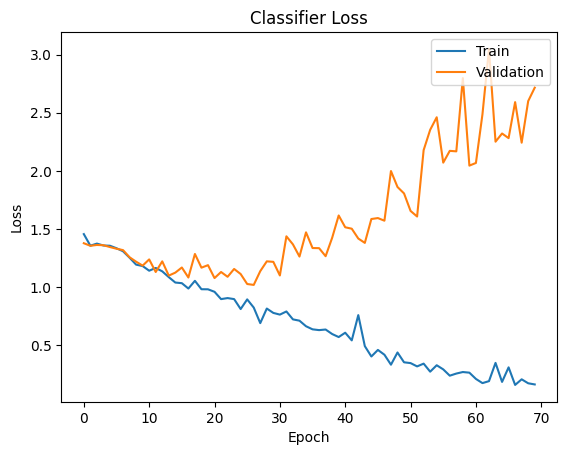

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Classifier Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

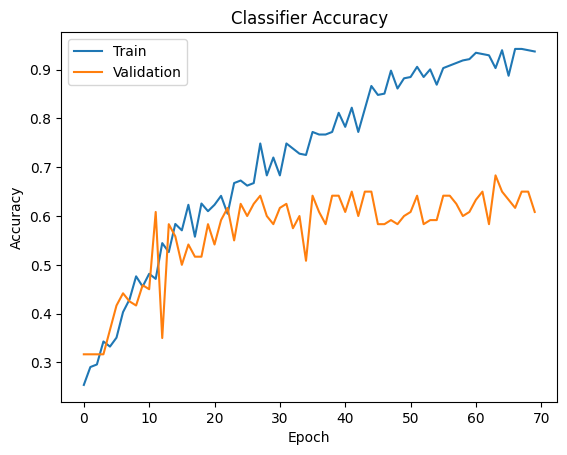

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

# Predict Apple Image

In [ ]:
!pip install keras

In [ ]:
!pip install --upgrade tensorflow


In [ ]:
import os
import matplotlib.pyplot as plt

CATEGORIES = ["Scab_Apple","Rot_Apple","Blotch_Apple","Normal_Apple"]
SIZE = (100, 100)
import keras.utils as image
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)


X_train = np.array(img).reshape(-1, SIZE[0], SIZE[1], 3)
X_train = X_train / 255.0
print(X_train.shape)

y_pred_probabilities = classifier.predict(X_train)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print('Terprediksi :' + CATEGORIES[y_pred[0]] )